<a href="https://colab.research.google.com/github/abhiruchi97/Econometrics-in-Python/blob/master/Instrumental_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install linearmodels

     |████████████████████████████████| 1.5MB 4.9MB/s 


In [0]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import linearmodels as lm
import matplotlib.pyplot as plt
import seaborn as sns

## We use a data set to estimate the determinants of the natural rate of unemployment for the United States. Since there is presence of endogeneity in certain potential regressors, we utilise the Two-Stage-Least-Squares (2SLS) regression.

1.   The first stage uses an OLS regression of the endogenous variable on the set of exogenous variables and its own instrumental variable (IV or proxy) from which we derive the predicted values of the endogenous variable. This is done to incorporate the effect of the IV on the endogenous variable to mitigate the endogeneity.
2.   In the second stage, we use the end-product of the first stage i.e. the predicted values of the endogenous variable and conduct a regular OLS regression of the dependent variable on all exogenous variables plus the new predicted variable, but not the IV.



In [0]:
data = pd.read_csv("dissert_dataset__instrumentalvar.csv")
data.head()

,DATE,natural_rate,%sect_shifts,runemp_bf_pc,log_growth,rhour_wage,rmin_wage,labfrc_gwth,pers_consmp,time
0,1960-10-01,5.476770,0.014062,7.896482,-0.013821,53.024000,1.0,-0.001567,17.255,1
1,1960-11-01,5.479093,0.024561,7.934455,-0.008383,53.009930,1.0,-0.003343,17.301,2
2,1960-12-01,5.481434,0.056744,7.923337,0.001977,53.145433,1.0,-0.004058,17.295,3
3,1961-01-01,5.483794,0.030253,7.936679,0.002089,53.378375,1.0,-0.001098,17.300,4
4,1961-02-01,5.486174,0.019528,7.952802,0.005338,53.656624,1.0,-0.002347,17.317,5


### In this exercise and in line with existing theory, following are the variables as characterised:

*   Dependent variable: natural_rate
*   Endogenous variable: rhour_wage
*   Instrumental variable: pers_consmp
*   Exogenous variables: (all else)



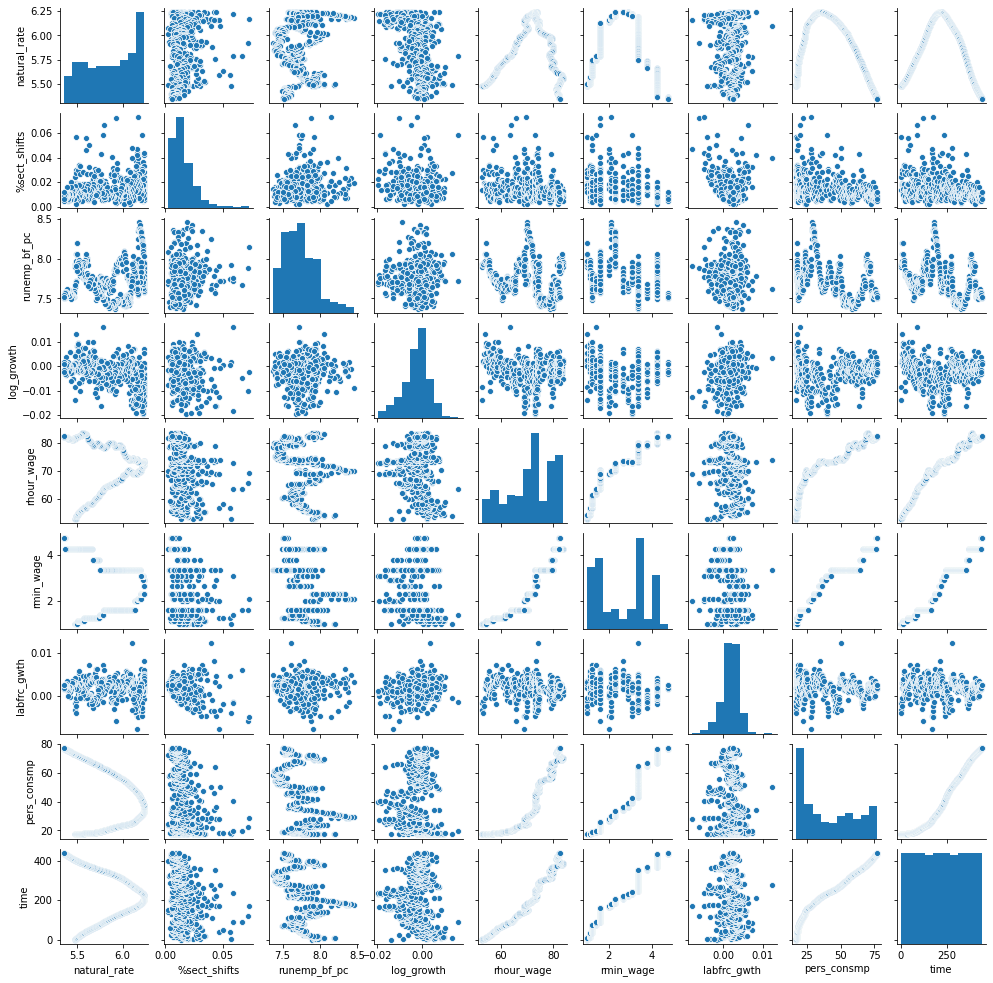

In [0]:
sns.pairplot(data.iloc[:,1:], height=1.5)

In [1]:
# generating the squared variable for the endogenous variable for another regression to capture a polynomial form

data["rhour_wage_squared"] = data["rhour_wage"]**2

NameError: ignored

In [0]:
# OLS

model_ols = sm.OLS(data["natural_rate"], sm.add_constant(data[['%sect_shifts', 'runemp_bf_pc', 'log_growth', 'rmin_wage', 'labfrc_gwth', 'time', 'rhour_wage', 'rhour_wage_squared']]))
res_ols = model_ols.fit(cov_type = "HC3")
print(res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:           natural_rate   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     308.0
Date:                Sun, 10 May 2020   Prob (F-statistic):          1.64e-172
Time:                        19:41:27   Log-Likelihood:                 354.03
No. Observations:                 438   AIC:                            -690.1
Df Residuals:                     429   BIC:                            -653.3
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -10.6367      0

In [0]:
'''2SLS
class IV2SLS(dependent, exog, endog, instruments, *, weights=None)'''

model = lm.iv.model.IV2SLS(data['natural_rate'], sm.add_constant(data[['%sect_shifts', 'runemp_bf_pc', 'log_growth', 'rmin_wage', 'labfrc_gwth', 'time']]), data['rhour_wage'], data['pers_consmp'])
results = model.fit(cov_type = 'robust', debiased="True")


In [0]:
print(results.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:           natural_rate   R-squared:                      0.5076
Estimator:                    IV-2SLS   Adj. R-squared:                 0.4995
No. Observations:                 438   F-statistic:                    197.54
Date:                Sun, May 10 2020   P-value (F-stat)                0.0000
Time:                        17:53:43   Distribution:                 F(7,430)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                               
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
const           -2.9069     0.4646    -6.2570     0.0000     -3.8200     -1.9938
%sect_shifts     1.8364     1.0032     1.830

### Tests for exogeneity

*   Null hypothesis: All endogenous variables are exogenous
*   Alternate hypothesis: The endogenous variables are endogenous


> P-value < 0.05 indicates rejection of the null, implying that the alt hypothesis stands





In [0]:
results.wooldridge_regression

Wooldridge's regression test of exogeneity
H0: Endogenous variables are exogenous
Statistic: 170.5898
P-value: 0.0000
Distributed: chi2(1)
WaldTestStatistic, id: 0x7fcd3220c908

In [0]:
results.durbin()

Durbin test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 161.0477
P-value: 0.0000
Distributed: chi2(1)
WaldTestStatistic, id: 0x7fcd34cbdd30

In [0]:
results.wu_hausman()

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 249.4635
P-value: 0.0000
Distributed: F(1,429)
WaldTestStatistic, id: 0x7fcd34cbdef0

In [0]:
# converting the table to a form amenable in LaTeX

print(results.summary.as_latex())